# Visualizing Geospatial Uranium Concentrations across Punjab
---

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("uranium1.csv", index_col="S.No.")
df.head()

,Collection Year,Collection Month,Collection Date,Location,Latitude,Longitude,Water Source,Depth of Water Level (m),Mean Uranium Conc (ppb or ug/L),Error Term,Uranium Activity (Bq/L),Excess Cancer Risk (10^-4),LADD (µg/kg/day),Hazard Quotient (HQ)
S.No.,,,,,,,,,,,,,,
1,1992.0,June,NaN,Guru Nanak Dev University,31.634129,74.825806,Tap,90.0,18.77,NaN,0.47,NaN,NaN,NaN
2,1992.0,July,NaN,Guru Nanak Dev University,31.634129,74.825806,Tap,90.0,20.23,NaN,0.51,NaN,NaN,NaN
3,1992.0,June,NaN,Tehsilpura,31.632052,74.888139,Tap,90.0,18.54,NaN,0.47,NaN,NaN,NaN
4,1992.0,July,NaN,Tehsilpura,31.632052,74.888139,Tap,90.0,17.87,NaN,0.45,NaN,NaN,NaN
5,1988.0,September,NaN,Thermal Colony,30.241900,74.948460,Tap,90.0,56.79,NaN,1.44,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 1 to 79
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Collection Year                  15 non-null     float64
 1   Collection Month                 15 non-null     object 
 2   Collection Date                  0 non-null      float64
 3   Location                         79 non-null     object 
 4   Latitude                         79 non-null     float64
 5   Longitude                        79 non-null     float64
 6   Water Source                     45 non-null     object 
 7   Depth of Water Level (m)         15 non-null     float64
 8   Mean Uranium Conc (ppb or ug/L)  79 non-null     float64
 9   Error Term                       34 non-null     float64
 10  Uranium Activity (Bq/L)          79 non-null     float64
 11  Excess Cancer Risk (10^-4)       30 non-null     float64
 12  LADD (µg/kg/day)             

## Data Preprocessing - Cleaning & Truncating
---

In [4]:
df_modified = df[
    [
        "Latitude",
        "Longitude",
        "Mean Uranium Conc (ppb or ug/L)",
        "Excess Cancer Risk (10^-4)",
        "LADD (µg/kg/day)",
        "Hazard Quotient (HQ)",
    ]
]
df_modified.head()

,Latitude,Longitude,Mean Uranium Conc (ppb or ug/L),Excess Cancer Risk (10^-4),LADD (µg/kg/day),Hazard Quotient (HQ)
S.No.,,,,,,
1,31.634129,74.825806,18.77,NaN,NaN,NaN
2,31.634129,74.825806,20.23,NaN,NaN,NaN
3,31.632052,74.888139,18.54,NaN,NaN,NaN
4,31.632052,74.888139,17.87,NaN,NaN,NaN
5,30.241900,74.948460,56.79,NaN,NaN,NaN


In [5]:
df_final = df_modified.iloc[:, 0:2].copy()

df_final["Uranium Conc"] = df_modified["Mean Uranium Conc (ppb or ug/L)"]
df_final["ECR"] = df_modified["Excess Cancer Risk (10^-4)"] * 0.0001
df_final["LADD"] = df_modified["LADD (µg/kg/day)"]
df_final["HQ"] = df_modified["Hazard Quotient (HQ)"]

df_final.head()

,Latitude,Longitude,Uranium Conc,ECR,LADD,HQ
S.No.,,,,,,
1,31.634129,74.825806,18.77,NaN,NaN,NaN
2,31.634129,74.825806,20.23,NaN,NaN,NaN
3,31.632052,74.888139,18.54,NaN,NaN,NaN
4,31.632052,74.888139,17.87,NaN,NaN,NaN
5,30.241900,74.948460,56.79,NaN,NaN,NaN


## EDA & Feature Selection
---

<Axes: >

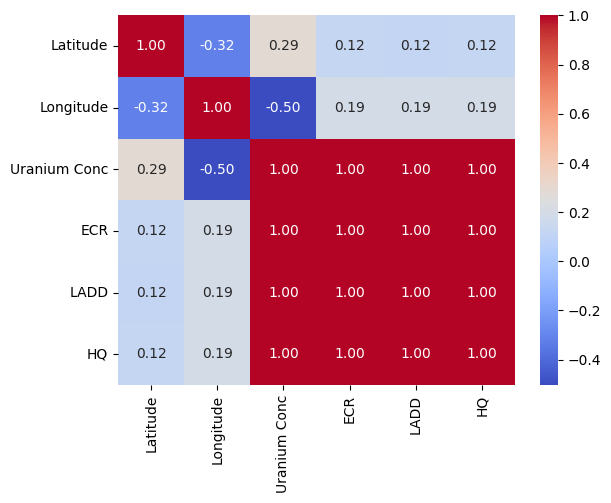

In [6]:
sns.heatmap(df_final.corr(), annot=True, fmt="0.2f", cmap="coolwarm")

In [7]:
df_final.drop(columns=["ECR", "LADD", "HQ"], inplace=True)
df_final.head()

,Latitude,Longitude,Uranium Conc
S.No.,,,
1,31.634129,74.825806,18.77
2,31.634129,74.825806,20.23
3,31.632052,74.888139,18.54
4,31.632052,74.888139,17.87
5,30.241900,74.948460,56.79


<Axes: >

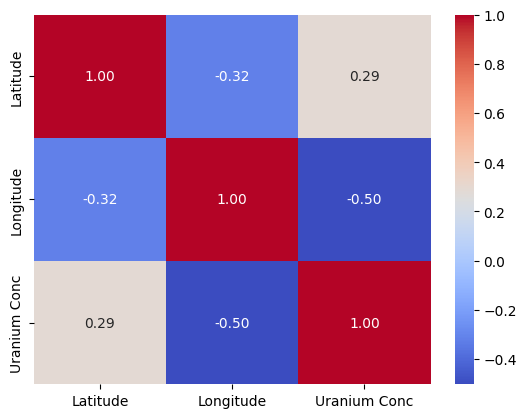

In [8]:
sns.heatmap(df_final.corr(), annot=True, fmt="0.2f", cmap="coolwarm")

Concentration depends more on Longitude (E-W) than Latitude (N-S) ??? Hmm!

### Univariate Analysis

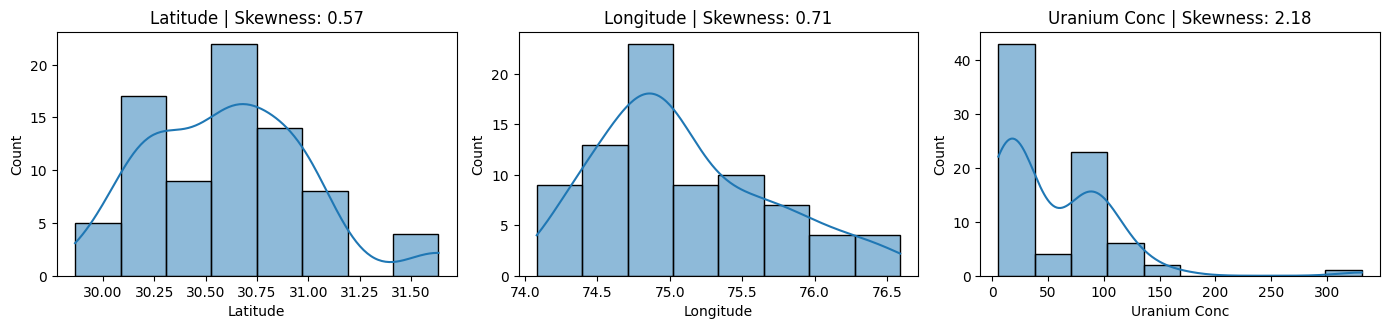

In [ ]:
plt.figure(figsize=(14, len(df_final.columns) * 3))
for i, col in enumerate(df_final.columns, 1):
    plt.subplot(len(df_final.columns), 3, i)
    sns.histplot(df_final[col], kde=True)
    plt.title(f"{col} | Skewness: {round(df_final[col].skew(), 2)}") # type: ignore
plt.tight_layout()
plt.show()

/home/ikansh/.local/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 68.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: >

/home/ikansh/.local/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


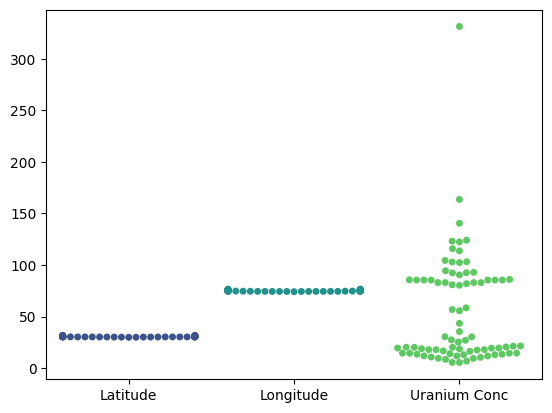

In [21]:
sns.swarmplot(data=df_final, palette="viridis")

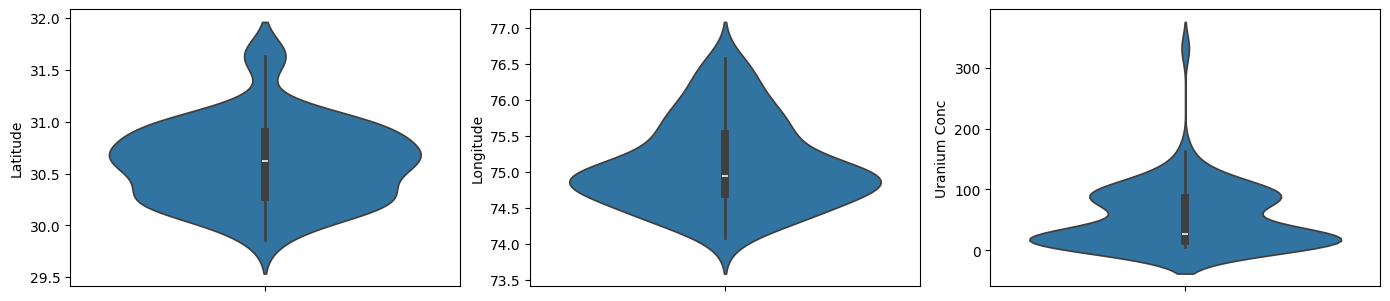

In [34]:
plt.figure(figsize=(14, len(df_final.columns) * 3))
for i, col in enumerate(df_final.columns, 1):
    plt.subplot(len(df_final.columns), 3, i)
    sns.violinplot(df_final[col])
plt.tight_layout()
plt.show()

### Bivariate Analysis

Coming back to that relationship between longitude and concentration...

<Axes: xlabel='Longitude', ylabel='Uranium Conc'>

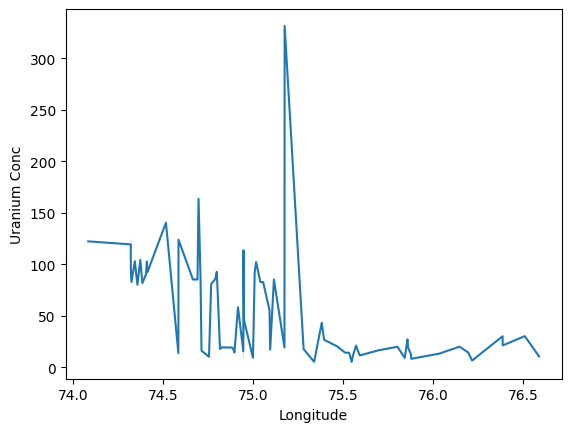

In [40]:
sns.lineplot(data=df_final, x="Longitude", y="Uranium Conc", errorbar="sd")

If we exclude the 'outlier', the concentration seems to decrease the Eastern we go!

<Axes: xlabel='Latitude', ylabel='Uranium Conc'>

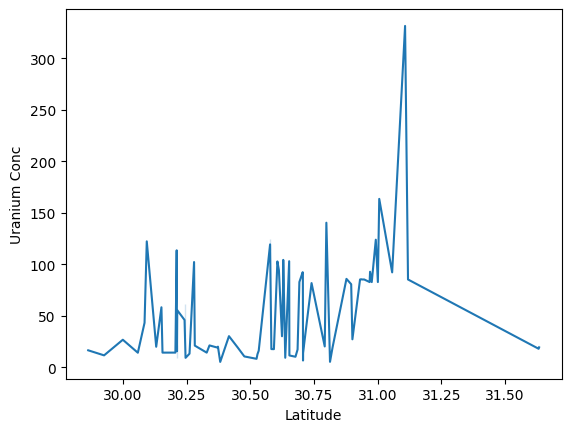

In [41]:
sns.lineplot(data=df_final, x="Latitude", y="Uranium Conc", errorbar="sd")

Here, the relationship's much more subtle, but concentration inceases slighlty the more Northern we go!

# Visualising on a Map
---

In [46]:
import folium
from folium.plugins import HeatMap

In [ ]:
m = folium.Map(
    location=[30.9, 75.8],
    zoom_start=8,
    tiles="OpenStreetMap",
)
m

In [56]:
HeatMap(
    df_final[["Latitude", "Longitude", "Uranium Conc"]].values.tolist(),
    min_opacity=0.3,  # how transparent when low density
    max_val=df_final["Uranium Conc"].max(),
    radius=25,  # point radius in pixels
    blur=15,  # amount of blur
    gradient={  # optional custom gradient
        0.2: "blue",
        0.4: "lime",
        0.6: "yellow",
        0.8: "orange",
        1.0: "red",
    },
).add_to(m)

m

/tmp/ipykernel_12177/2484490174.py:1: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(
